## Домашнее задание

__Задание 1. Генератор случайных матриц.__

Реализовать генератор матриц, который должен поддерживать функции:
* Генерация абсолютно случайной матрицы $n\times m$ -
* Генерация случайной диагональной матрицы $n\times n$ -
* Генерация случайной верхнетреугольной матрицы -
* Генерация случайной нижнетреугольной матрицы-
* Генерация симметричной матрицы -
* Генерация вырожденной матрицы - 
* Генерация матрицы ступенчатого вида $n\times n$ ранга $m$
* Генерация возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$. Оценить величину нормы матрицы возмущений в зависимости от параметра $\varepsilon$ (оценить верхную границу).

Оценить численно вероятность того, что созданная матрица будет вырожденной для какого-либо случая выше.

In [2]:
import numpy as np

def matrix_generate(rows, columns, type_ = "full", eps = 0):

    A = None

    if type_ == "full":

        A = np.random.random(size=(rows, columns))

    
    elif type_ == "down_triangular":

        A = np.random.random(size=(rows, columns))

        for i in range(rows):
            for j in range(columns):
                if (i < j):
                    A[i, j] = 0

        # Для нижнетреугольной подумайте, как сделать без циклов for :) (звёздочка)

    elif type_ == "upper_triangular":

        A = np.random.random(size=(rows, columns))

        for i in range(rows):
            for j in range(columns):
                if (i > j):
                    A[i, j] = 0

        # Для нижнетреугольной подумайте, как сделать без циклов for :) (звёздочка)

    elif type_ == "symmetric":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.random.random(size=(rows, columns))

            for i in range(rows):
                for j in range(columns):
                    if (i > j):
                        A[i, j] = A[j, i]

    elif type_ == "degenerate":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.random.random(size=(rows, columns))

            for i in range(1, rows):
                for j in range(columns):
                        A[i, j] = (1+i)*A[0, j]


    elif type_ == "diagonal":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.random.random(size=(rows, columns))

            for i in range(rows):
                for j in range(columns):
                    if (i != j):
                        A[i,j] = 0

            # И эту секцую тоже перепишите без for (звёздочка). Учтите, что портить uniform распределение нельзя.

    elif type_ == "stepwise":

        A = np.random.random(size=(rows, rows))
        for i in range(rows):
            for j in range(rows):
                if (i > j):
                    A[i,j] = 0
        for m in range(rows - columns):
            for j in range(rows):
                A[rows-m-1][j] = 0



    elif type_ == "eps":

        A = 10*np.random.random(size=(rows, rows)) - 5
        A = eps/np.abs(np.max(A))*np.abs(A)*np.sign(A)
        a = np.linalg.norm(A)
        
             


    return A

In [5]:
matrix_generate(1, 3)

array([[0.19536615, 0.90280922, 0.03680549]])

In [6]:
matrix_generate(4, 2, type_ = "down_triangular")

array([[0.17101489, 0.        ],
       [0.22004281, 0.6433291 ],
       [0.16616211, 0.67681819],
       [0.08884776, 0.97243226]])

In [7]:
matrix_generate(4, 4, type_ = "diagonal")

array([[0.65036541, 0.        , 0.        , 0.        ],
       [0.        , 0.08377241, 0.        , 0.        ],
       [0.        , 0.        , 0.29754319, 0.        ],
       [0.        , 0.        , 0.        , 0.25231265]])

In [8]:
a = matrix_generate(4, 4, type_ = "degenerate")
np.linalg.det(a)

0.0

In [9]:
print(matrix_generate(4, 3, type_ = "stepwise"))



[[0.06792442 0.3628061  0.17402673 0.00935477]
 [0.         0.90721469 0.94899419 0.04051655]
 [0.         0.         0.58897323 0.229572  ]
 [0.         0.         0.         0.        ]]


In [10]:
A = matrix_generate(4, 5, type_ = "eps", eps = 2)
print(np.linalg.norm(A))


B = np.copy(A)
B[:] = np.max(A)
print(np.linalg.norm(B, 2))

4.5837467180057905
8.0


Оценим вероятность для случая (когда просят сгенерировать вырожденную матрицу. Матрица у нас вырождена всегда, то есть p = 1. Lol

На самом деле покажем для случайно матрицы


In [17]:
count = 0
n = 1000000
for i in range(n):
    b = matrix_generate(2, 2)
    if (np.linalg.det(b)) == 0:
        print("degenerate")
        count += 1
if (count == 0):
    print("Possibility lower than ", 1/n*100)
else:
    print("Possibility lower than", count/n*100)
    



Possibility lower than  9.999999999999999e-05


Получили, что вероятность генерации вырожденной матрицы 2x2 меньше $10^{-6}$ процента 

__Задание 2. Вычисление матричных норм и числа обусловленности.__

Реализовать вычисление трех основных норм векторов (L1, L2 и максимальную) и подчиненных им матричных норм. Реализовать вычисление числа обусловленности.

Примечание: для вычисления собственных значений можно использовать linalg.eigvals из модуля scipy.

In [11]:
n = 6
vector = np.random.randint(6, size = n)
p = np.array([1,2,np.inf])
for i in p:
    print("Нормы вектора", np.linalg.norm(vector, i))



Нормы вектора 13.0
Нормы вектора 7.0
Нормы вектора 5.0


Вычилим нормы векторов, взяв за данные очень большое число матриц

In [15]:
m = 10000
p = np.array([1,2,np.inf])
Matrix = -5 + np.random.randint(10, size = (n,n))
answers = np.zeros(3)
count = 0
for j in p:
    Matrix_norms = np.zeros(m)
    for i in range(m):
        vector = np.random.randint(6, size = n)
        if (np.linalg.norm(vector)!= 0 ):
            Matrix_norms[i] = np.linalg.norm(np.matmul(vector, Matrix), j)/np.linalg.norm(vector, j)
    answers[count] = np.max(Matrix_norms)
    count+= 1
print(answers)
    
        
        
    

[18.          9.15078369 12.4       ]


Вычислим число обусловленности

In [18]:
value = np.zeros(3)
# Для p = 2
own_values = np.linalg.eigvals(np.matmul(np.transpose(Matrix), Matrix))
#print(own_values)
value[1] = np.sqrt(np.max(own_values)/np.min(own_values))
print(value[1])
# Для p = 1, inf
value[0] = value[2] = np.linalg.norm(Matrix, np.inf) * np.linalg.norm(np.linalg.inv(Matrix), np.inf)
print(value[0])



8.191195786862727
20.604275286757044


__Задание 3. Эквивалентность первых двух норм.__

Найдите константы $C_1$  и  $C_2$ такие, что

$\ C_1||\mathbf{x}||_2\leq||\mathbf{x}||_1\leq C_2||\mathbf{x}||_2$


Указание: в качестве подсказки можно использовать визуализацию норм из документа с теорией.

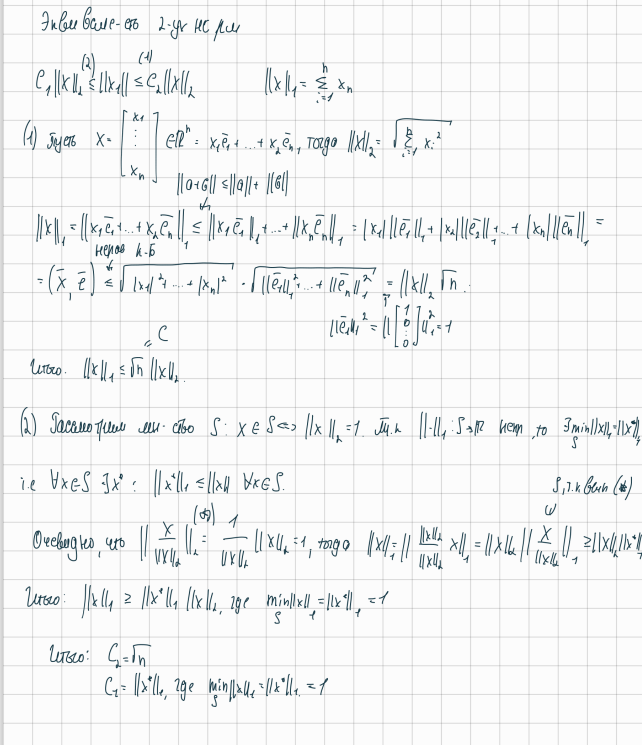

__Задание 4. Евклидова и бесконечная норма.__

 Пусть x — вектор размерности m, а A — матрица m×n. Докажите следующие неравенства и приведите
примеры таких x и A, при которых неравенства обращаются в равенства:

- $\|x\|_2 \leq \sqrt{m} \cdot \|x\|_{\infty}$
- $\|A\|_{\infty} \leq \sqrt{n} \cdot \|A\|_2$

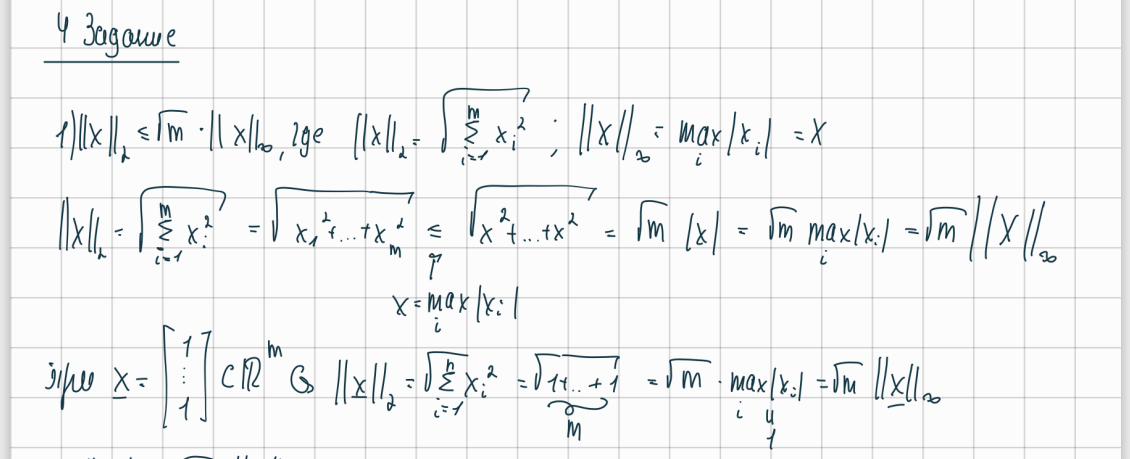